In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



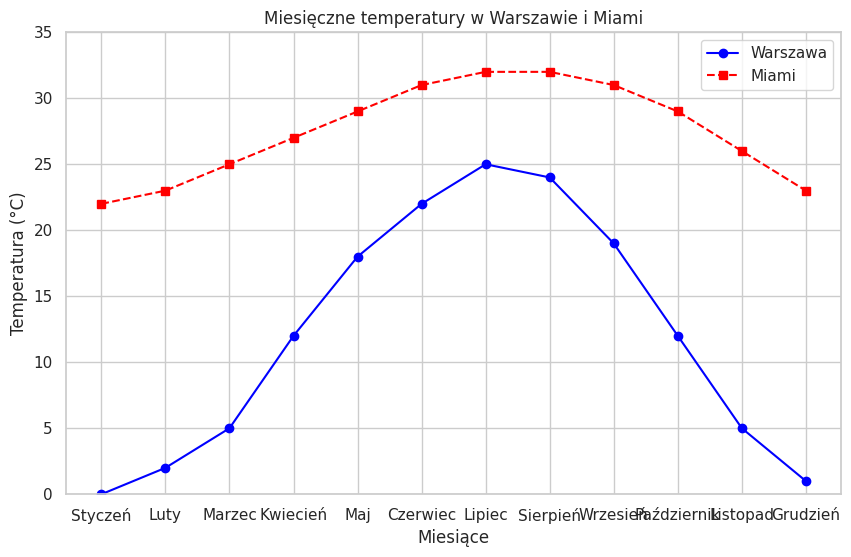

In [63]:

# Zadanie 1

# Generowanie danych
months = ['Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec', 'Lipiec', 'Sierpień', 'Wrzesień', 'Październik', 'Listopad', 'Grudzień']
temperatures_warsaw = [0, 2, 5, 12, 18, 22, 25, 24, 19, 12, 5, 1]
temperatures_miami = [22, 23, 25, 27, 29, 31, 32, 32, 31, 29, 26, 23]

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
plt.plot(months, temperatures_warsaw, marker='o', label='Warszawa', color='blue', linestyle='-')
plt.plot(months, temperatures_miami, marker='s', label='Miami', color='red', linestyle='--')
plt.legend()

plt.title('Miesięczne temperatury w Warszawie i Miami')
plt.xlabel('Miesiące')
plt.ylabel('Temperatura (°C)')

# Dostosowanie zakresu osi Y
plt.ylim(0, 35)

# Dodanie siatki
plt.grid(True)

# Zapis wykresu jako png
plt.savefig('temperatures.png', dpi=300)

# Wyświetlenie wykresu
plt.show()

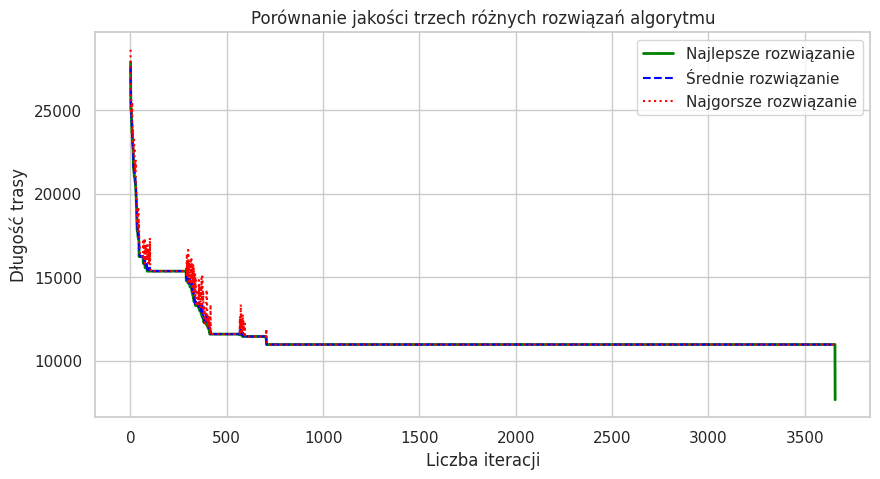

In [64]:
# Zadanie 2

path_best = '/content/best solution.txt'
path_median = '/content/median solution.txt'
path_worst = '/content/worst solution.txt'

# Funkcja do wczytania danych, zamieniająca przecinki na kropki
def load_data(path):
    with open(path, 'r') as file:
        data = file.read().splitlines()
    data = [float(line.replace(',', '.')) for line in data]
    return pd.DataFrame(data, columns=['DlugoscTrasy'])

# Wczytanie danych
df_best = load_data(path_best)
df_median = load_data(path_median)
df_worst = load_data(path_worst)

# Dodanie kolumny 'Iteracje', która będzie odpowiadać numerowi indeksu
df_best['Iteracje'] = range(1, len(df_best) + 1)
df_median['Iteracje'] = range(1, len(df_median) + 1)
df_worst['Iteracje'] = range(1, len(df_worst) + 1)
plt.figure(figsize=(10, 5))

# Wykresy
plt.plot(df_best['Iteracje'], df_best['DlugoscTrasy'], label='Najlepsze rozwiązanie', color='green', linewidth=2)

plt.plot(df_median['Iteracje'], df_median['DlugoscTrasy'], label='Średnie rozwiązanie', color='blue', linestyle='--')

plt.plot(df_worst['Iteracje'], df_worst['DlugoscTrasy'], label='Najgorsze rozwiązanie', color='red', linestyle=':')

# Dodanie tytułu i podpisów osi
plt.title('Porównanie jakości trzech różnych rozwiązań algorytmu')
plt.xlabel('Liczba iteracji')
plt.ylabel('Długość trasy')
plt.legend()

# dostosowanie DPI dla lepszej jakości wykresu
plt.savefig('porownanie_rozwiazan.png', dpi=1200)  # Zapis do pliku PNG

# Pokazanie wykresu
plt.show()

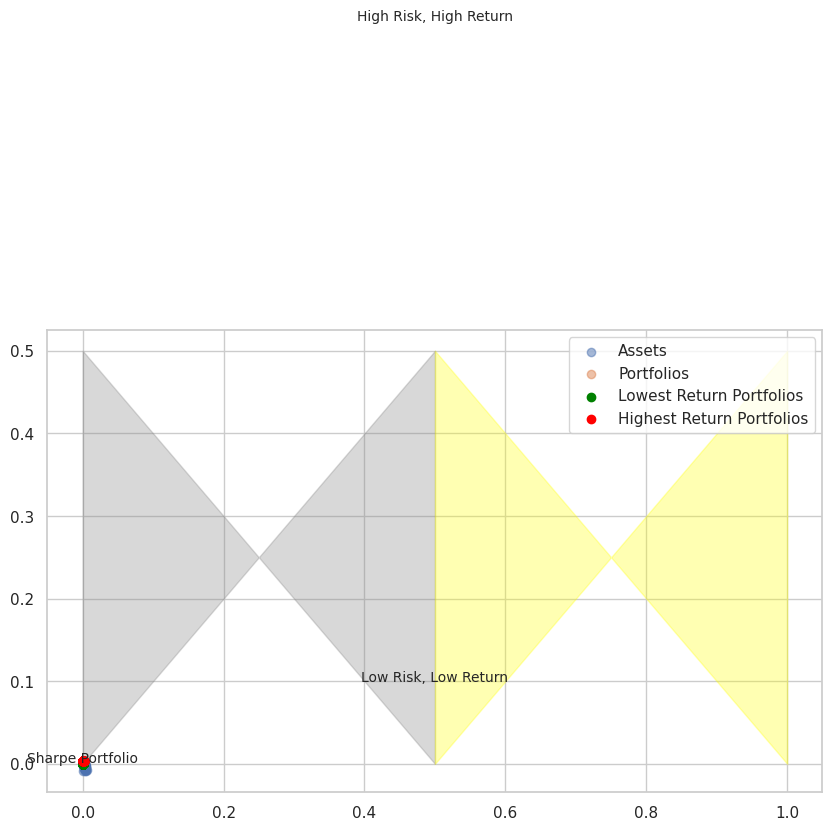

In [65]:
# Zadanie 3

# Wczytanie danych
portfolios = pd.read_table("/content/Pareto Front.txt", sep="\s+")
assets = pd.read_table("/content/assets.txt", sep="\s+")

# Stworzenie wykresu rozrzutu dla aktywów i portfeli
plt.figure(figsize=(10, 6))
plt.scatter(assets['Variance'], assets['Mean'], label='Assets', alpha=0.5)
plt.scatter(portfolios['Variance'], portfolios['Mean'], label='Portfolios', alpha=0.5)

# Dodanie etykiet tekstowych
plt.text(0.5, 0.9, 'High Risk, High Return', fontsize=10, ha='center')
plt.text(0.5, 0.1, 'Low Risk, Low Return', fontsize=10, ha='center')
plt.text(np.mean(portfolios['Variance']), np.mean(portfolios['Mean']), 'Sharpe Portfolio', fontsize=10, ha='center')

# Zaznaczenie obszarów o wysokim i niskim ryzyku oraz zwrocie
plt.fill_between([0, 0.5], [0, 0.5], [0.5, 0], color='gray', alpha=0.3)
plt.fill_between([0.5, 1], [0, 0.5], [0.5, 0], color='yellow', alpha=0.3)

# Zaznaczenie 500 portfeli o najniższym i najwyższym zwrocie
lowest_return_portfolios = portfolios.nsmallest(500, 'Mean')
highest_return_portfolios = portfolios.nlargest(500, 'Mean')
plt.scatter(lowest_return_portfolios['Variance'], lowest_return_portfolios['Mean'], color='green', label='Lowest Return Portfolios')
plt.scatter(highest_return_portfolios['Variance'], highest_return_portfolios['Mean'], color='red', label='Highest Return Portfolios')

# Dodanie legendy
plt.legend()

# Wyświetlenie wykresu
plt.show()

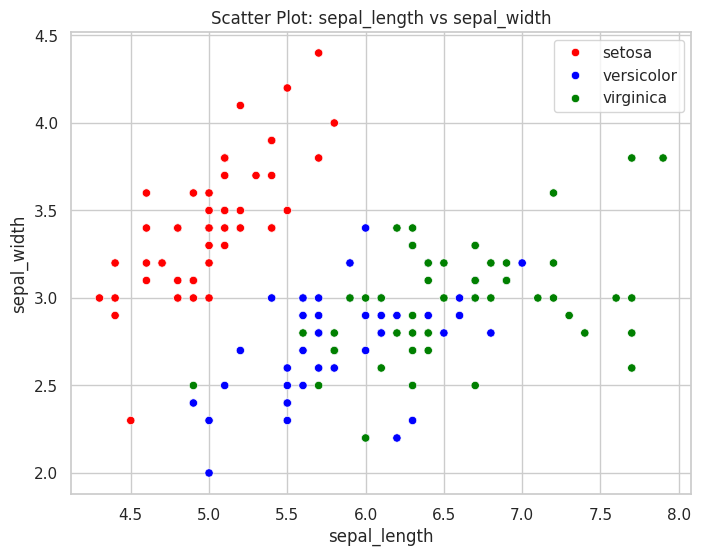

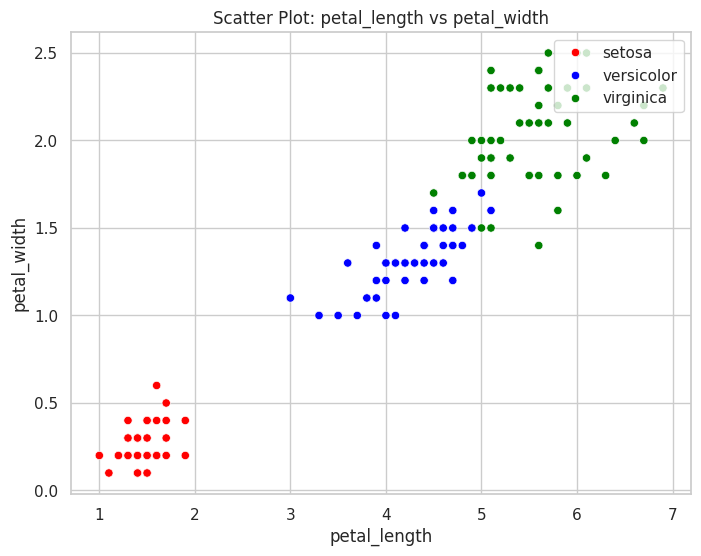

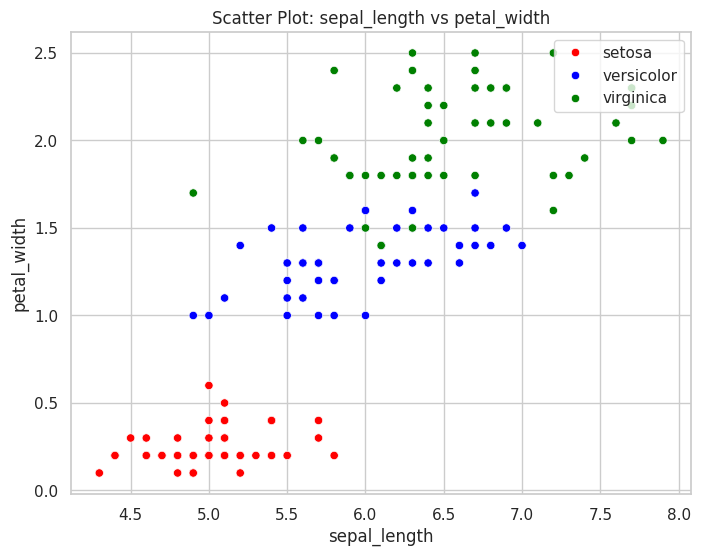

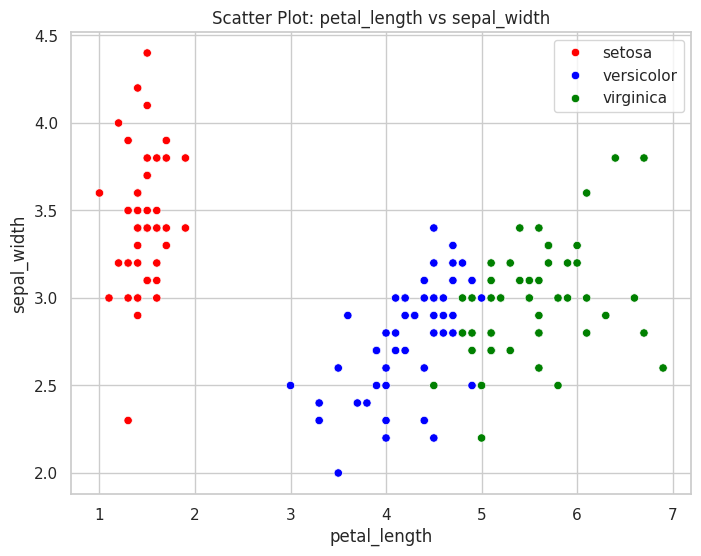

In [66]:
# Zadanie 4

import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie danych Iris
iris = sns.load_dataset("iris")

# Definicja kolorów dla każdej klasy
colors = {'setosa':'red', 'versicolor':'blue', 'virginica':'green'}

# Pary atrybutów
attributes_pairs = [('sepal_length', 'sepal_width'),
                    ('petal_length', 'petal_width'),
                    ('sepal_length', 'petal_width'),
                    ('petal_length', 'sepal_width')]

# Tworzenie wykresów dla każdej pary atrybutów
for pair in attributes_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pair[0], y=pair[1], hue='species', palette=colors, data=iris)
    plt.title(f"Scatter Plot: {pair[0]} vs {pair[1]}")
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.legend(loc='upper right')
    plt.show()

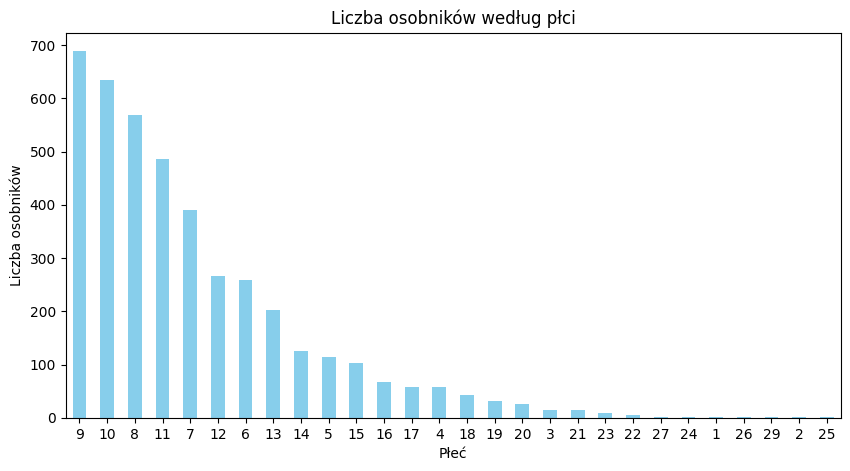

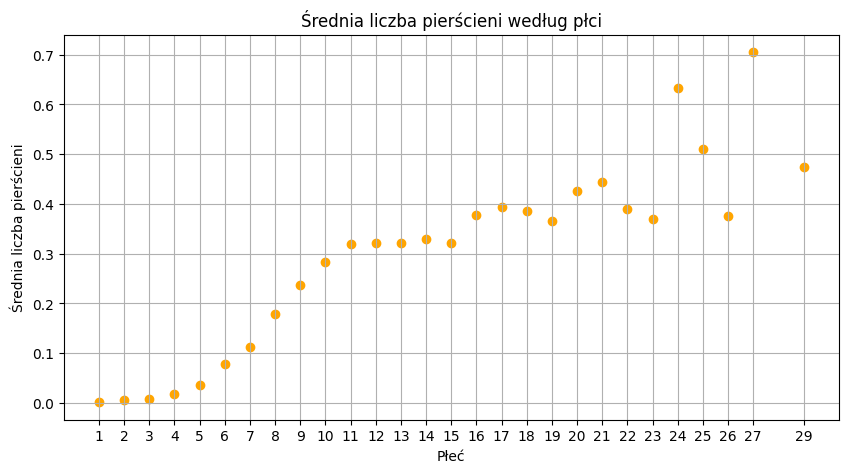

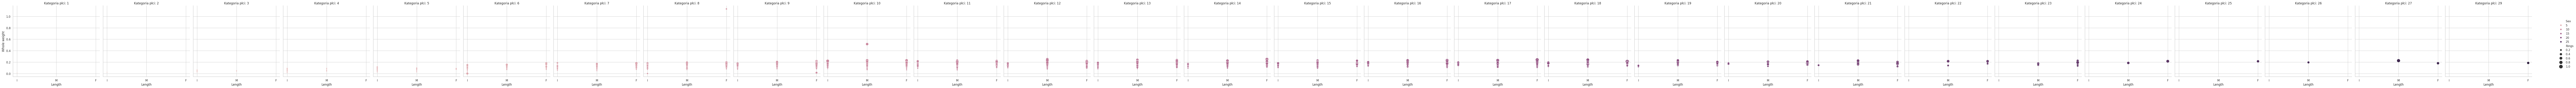

In [ ]:
# Zadanie 5 + 6
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z odpowiednimi nazwami kolumn
abalone_data = pd.read_csv("/content/abalone.csv", header=None, names=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings', 'Sex'])

# Liczba osobników w każdej kategorii (M, F, I)
count_by_sex = abalone_data['Sex'].value_counts()

# Średnia liczba pierścieni dla każdej kategorii (M, F, I)
mean_rings_by_sex = abalone_data.groupby('Sex')['Rings'].mean()

# Wykres słupkowy dla liczby osobników
plt.figure(figsize=(10, 5))
count_by_sex.plot(kind='bar', color='skyblue')
plt.title('Liczba osobników według płci')
plt.xlabel('Płeć')
plt.ylabel('Liczba osobników')
plt.xticks(rotation=0)
plt.show()

# Wykres punktowy dla średniej liczby pierścieni
plt.figure(figsize=(10, 5))
plt.scatter(mean_rings_by_sex.index, mean_rings_by_sex.values, color='orange')
plt.title('Średnia liczba pierścieni według płci')
plt.xlabel('Płeć')
plt.ylabel('Średnia liczba pierścieni')
plt.xticks(mean_rings_by_sex.index)
plt.grid(True)
plt.show()

# Zadanie 6

import seaborn as sns


# Ustawienie stylu wykresu
sns.set(style="whitegrid")

# Tworzenie trzech różnych wykresów rozrzutu z wykorzystaniem parametru hue dla każdej kategorii płci
g = sns.relplot(x='Length', y='Whole weight', hue='Sex', size='Rings', sizes=(10, 200), data=abalone_data, col='Sex', height=5, aspect=1)

# Ustawienie tytułów dla każdego wykresu
g.set_titles("Kategoria płci: {col_name}")

# Wyświetlenie wykresów
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

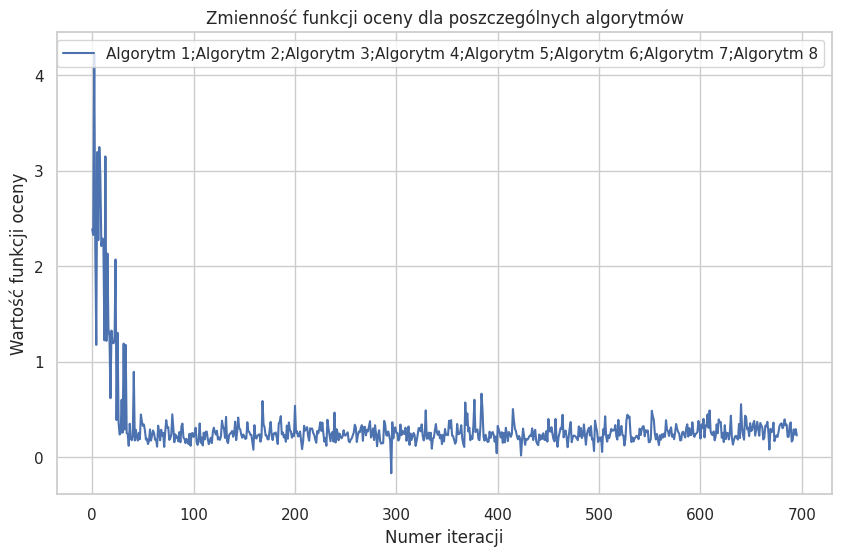

In [ ]:
# Zadanie 7

import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych
with open("/content/Zadanie 7 poziom podstawowy.csv", "r") as file:
    lines = file.readlines()

# Podział danych na kategorie algorytmów
algorithm_data = {}
current_algorithm = None
for line in lines:
    line = line.strip()
    if line.startswith("Algorytm"):
        current_algorithm = line
        algorithm_data[current_algorithm] = []
    elif current_algorithm:
        # Zamiana przecinków na kropki i podzielenie danych na liczby
        numbers = line.replace(',', '.').split(';')
        algorithm_data[current_algorithm].extend(map(float, numbers))

# Stworzenie DataFrame z podzielonych danych
data = pd.DataFrame(algorithm_data)

# Przygotowanie wykresów liniowych dla poszczególnych algorytmów
plt.figure(figsize=(10, 6))
for algorithm in data.columns:
    plt.plot(data.index, data[algorithm], label=algorithm)

# Dodanie tytułów i etykiet
plt.title('Zmienność funkcji oceny dla poszczególnych algorytmów')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość funkcji oceny')
plt.legend()
plt.grid(True)

# Wyświetlenie wykresu
plt.show()

Animal      0
Feathers    0
Eggs        0
Fly         0
Predator    0
Venomous    0
Tail        0
dtype: int64
Animal      0
Feathers    0
Eggs        0
Fly         0
Predator    0
Venomous    0
Tail        0
dtype: int64


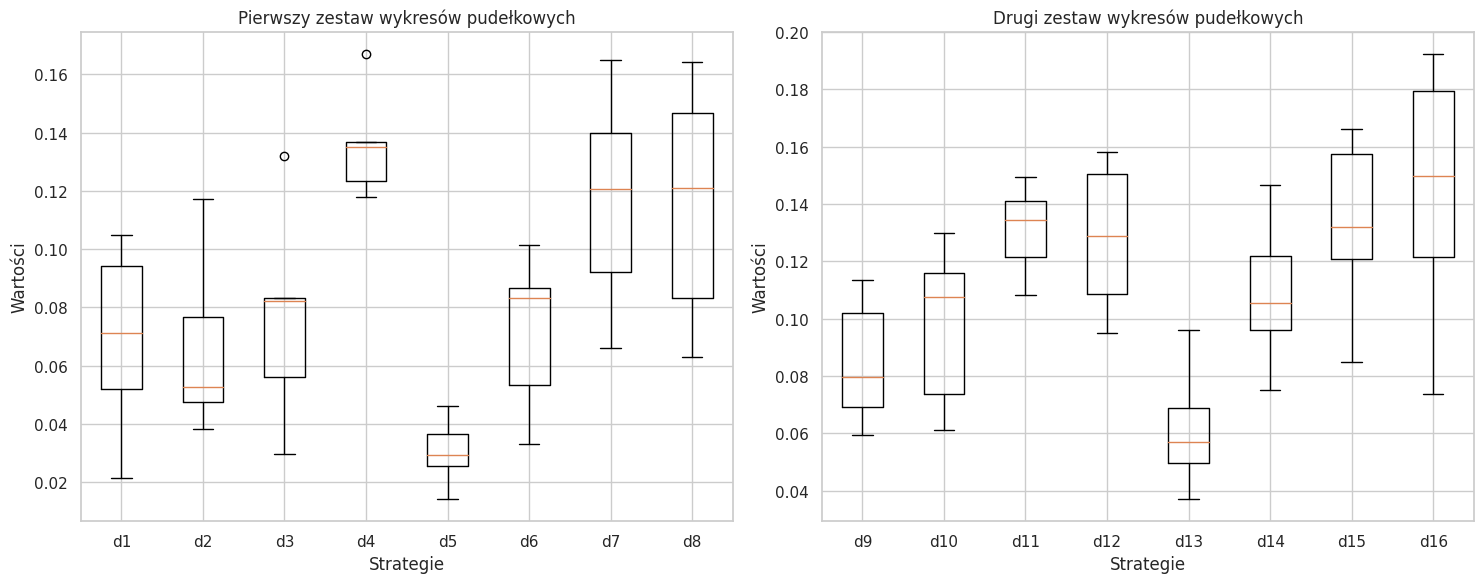

In [ ]:
# Zadanie 9

import re
import matplotlib.pyplot as plt

# Wczytanie danych z pliku
with open("/content/Zadanie 9 poziom podstawowy.txt", "r") as file:
    data_fragment = file.read()


# Wyrażenie regularne do wyodrębnienia danych liczbowych
pattern = r'c\((.*?)\);'
matches = re.findall(pattern, data_fragment)

# Przetworzenie danych do odpowiedniego formatu
data = {}
for i, match in enumerate(matches, start=1):
    values = list(map(float, match.split(',')))
    strategy = f'd{i}'
    data[strategy] = values

# Stworzenie dwóch zestawów danych dla dwóch wykresów
# Zakładając, że mamy osiem strategii i chcemy podzielić je na dwa zestawy po cztery
strategies = list(data.keys())
half = len(strategies) // 2

# Pierwszy zestaw danych
data_set1 = {strategy: data[strategy] for strategy in strategies[:half]}

# Drugi zestaw danych
data_set2 = {strategy: data[strategy] for strategy in strategies[half:]}

# Tworzenie dwóch wykresów pudełkowych
plt.figure(figsize=(15, 6))

# Pierwszy wykres pudełkowy
plt.subplot(1, 2, 1)
plt.boxplot(data_set1.values(), labels=data_set1.keys())
plt.title('Pierwszy zestaw wykresów pudełkowych')
plt.xlabel('Strategie')
plt.ylabel('Wartości')

# Drugi wykres pudełkowy
plt.subplot(1, 2, 2)
plt.boxplot(data_set2.values(), labels=data_set2.keys())
plt.title('Drugi zestaw wykresów pudełkowych')
plt.xlabel('Strategie')
plt.ylabel('Wartości')

# Wyświetlenie wykresów
plt.tight_layout()
plt.show()